In [74]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  9 07:19:24 2021

@author: Hwang
"""
import numpy as np
import pandas as pd
#from time import time
from glob import glob
import os
from sklearn.model_selection import train_test_split
#import argparse
import graphviz
workingdir = r'C:\Users\USER\Dropbox\PC (2)\Desktop\EDM_LAB\14. 교수님논문(2)'
os.chdir(os.path.join(workingdir, 'modules' )) 
#from rulebase import ruleBase as ubr
from usertree import userTree as utr
import modules.utils as ut
import utils
os.chdir(os.path.join(workingdir))

In [75]:
os.getcwd()

'C:\\Users\\USER\\Dropbox\\PC (2)\\Desktop\\EDM_LAB\\14. 교수님논문(2)'

In [76]:
save_dir = 'save_dir'

# target attribute name
target_att = 'class'

# train(train:test) : test = 8(8:2) : 2
test_ratio = 0.2

# DT terminating criteria
MAX_DEPTH = 1000
sample_ratio = 0.03

In [77]:
# Get the Data 
raw_df = pd.read_csv('https://raw.githubusercontent.com/countifs/rawdata/main/UCI%20-%20Breast%20Cancer%20Wisconsin%20(Original)/breastCancer.csv')

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

# train(train:test) : test = 8(8:2) : 2
test_ratio = 0.2

# DT terminating criteria
MAX_DEPTH = 1000
sample_ratio = 0.03

# Get the Data 
raw_df = pd.read_csv('https://raw.githubusercontent.com/countifs/rawdata/main/UCI%20-%20Breast%20Cancer%20Wisconsin%20(Original)/breastCancer.csv')

def preprocess(raw_df):
    df = raw_df.copy()
    df = df[df['bare_nucleoli'] != '?'] # 16개의 '?' 행 제거
    df['bare_nucleoli'] = df['bare_nucleoli'].astype(int) # 문자열을 정수형으로 변환
    df.drop_duplicates(inplace=True) # 중복된 행 제거
    df.replace({'class': {2: 0, 4: 1}}, inplace=True)  # 2: Benign, 4: Malignant
    df.reset_index(drop=True, inplace=True) # index 재설정
    df.drop(columns=['id'], axis=1, inplace=True) # id 열 제거
    return df

data = preprocess(raw_df).copy()

from sklearn.model_selection import train_test_split

X = data.drop(columns='class')
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)



In [79]:
colnm = data.columns

target_elements = np.unique(y)

# 최소 리프노드 샘플 수
n_samples = int(sample_ratio * len(X_train))

# target data를 제외한 feature들
in_feature = list(data.columns [data.columns != target_att])

n_samples = int(sample_ratio * len(X_train))

# train <-> test
model_dict = {}

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# [paper]

In [80]:
lambda_ = 0.05 # for paper version DT
lambda_range = sorted([1-np.log10(i) for i in np.arange(1,10,1)]) # for adaptive version

In [81]:
lambda_range

[0.04575749056067513,
 0.09691001300805646,
 0.1549019599857432,
 0.22184874961635637,
 0.30102999566398114,
 0.3979400086720376,
 0.5228787452803376,
 0.6989700043360187,
 1.0]

# 1. HH - simply false

## 1. 첫번째 트리

In [82]:
from usertree import userTree as utr
import utils

In [83]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)

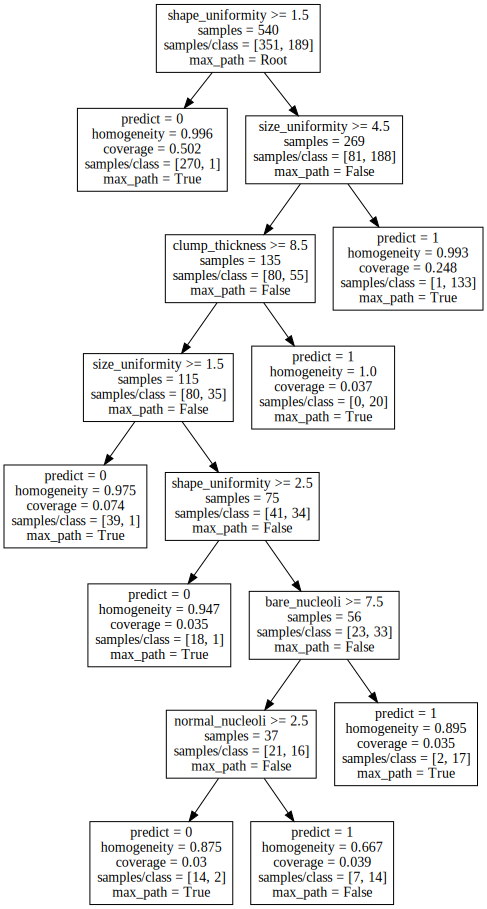

In [84]:
P_tree_graph

## 2. 두번째 트리

In [39]:
train2 = train.query('shape_uniformity >= 1.5')

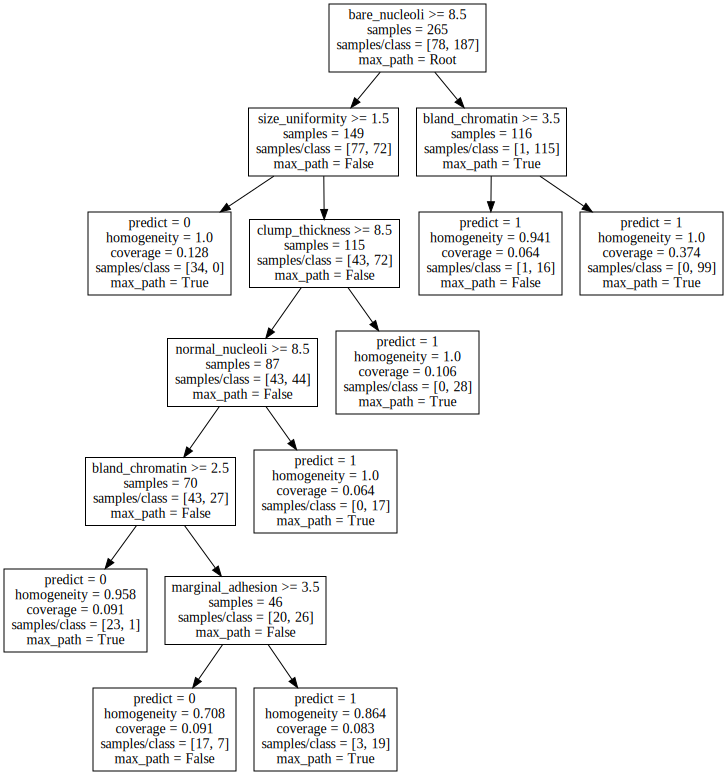

In [41]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=False)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train2, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

In [44]:
train3 = train2.query('bare_nucleoli < 8.5')

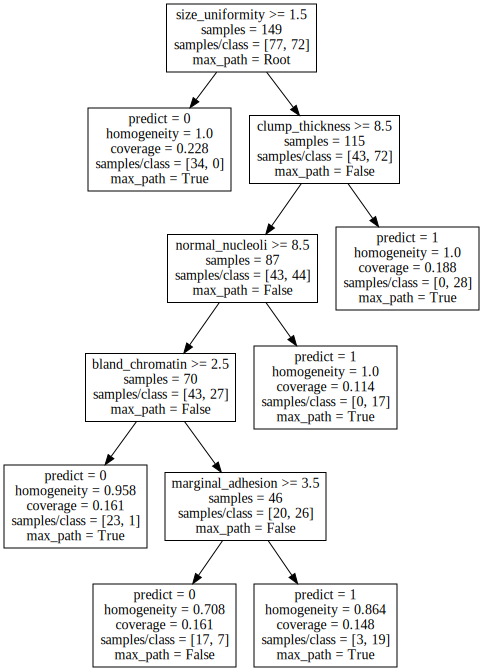

In [46]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=False)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train3, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

In [50]:
train4 = train3.query('size_uniformity <1.5')

In [222]:
train2 = train.query('shape_uniformity < 1.5 and bare_nucleoli < 1.5')

In [230]:
train.query('shape_uniformity >= 1.5 or bare_nucleoli >= 1.5')

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
389,3,1,2,1,2,1,2,1,1,0
610,8,7,4,4,5,3,5,10,1,1
298,5,5,5,2,5,10,4,3,1,1
313,5,2,2,2,2,1,2,2,1,0
128,5,1,3,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
226,10,4,5,5,5,10,4,1,1,1
168,8,6,5,4,3,10,6,1,1,1
255,3,3,5,2,3,10,7,1,1,1
258,8,4,7,1,3,10,3,9,2,1


In [228]:
# train2 index가 아닌 데이터 

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
610,8,7,4,4,5,3,5,10,1,1
298,5,5,5,2,5,10,4,3,1,1
283,8,4,10,5,4,4,7,10,1,1
14,8,7,5,10,7,9,5,5,4,1
657,10,10,10,10,5,10,10,10,7,1
...,...,...,...,...,...,...,...,...,...,...
485,8,10,10,10,7,5,4,8,7,1
226,10,4,5,5,5,10,4,1,1,1
168,8,6,5,4,3,10,6,1,1,1
255,3,3,5,2,3,10,7,1,1,1


In [212]:
train2 = train[~train.index.isin(train2.index)]

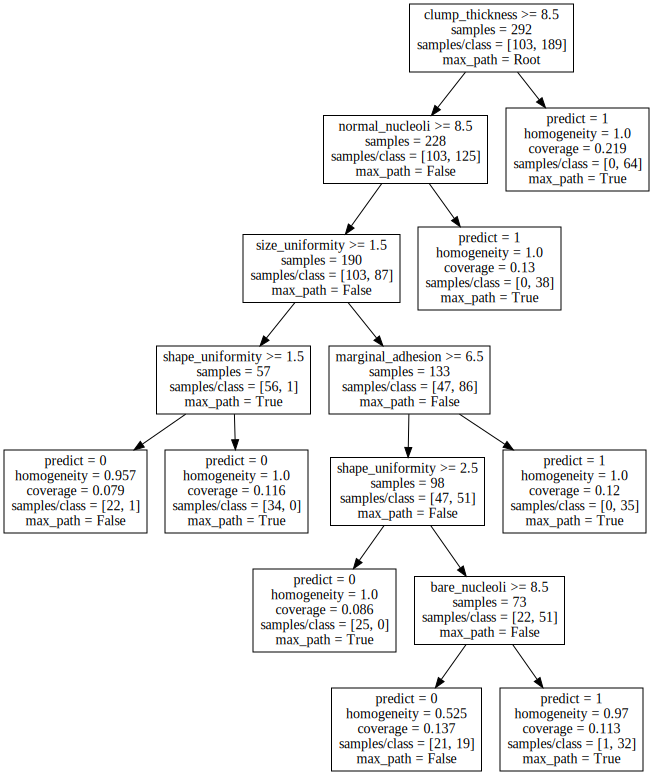

In [214]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=False)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train2, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph


## 3. 세번째 트리

In [217]:
train3 = train2.query('clump_thickness >= 8.5')
train3 = train2[~train2.index.isin(train3.index)]

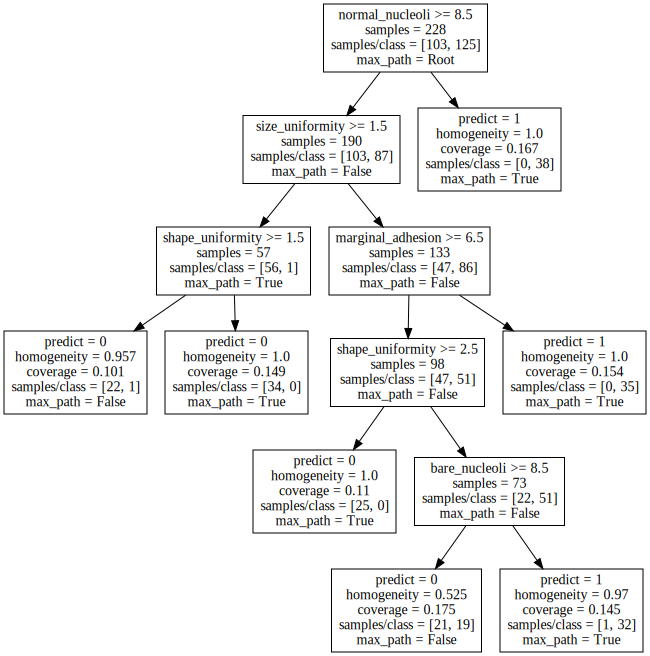

In [219]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=False)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train3, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

## 4. 네번째 트리

In [220]:
train4 = train3.query('normal_nucleoli >= 8.5')
train4 = train3[~train3.index.isin(train4.index)]

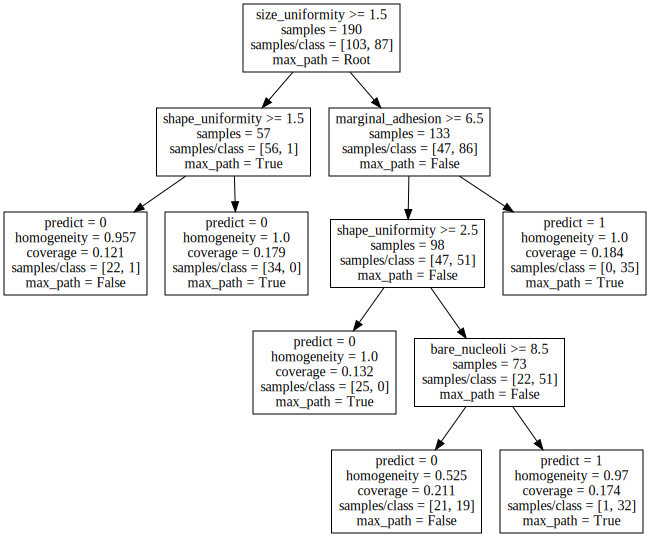

In [221]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=False)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train4, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

In [ ]:
train5 = train4.query('normal_nucleoli >= 8.5')
train5 = train4[~train3.index.isin(train5.index)]

In [147]:
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5').shape

(28, 10)

In [156]:
train.query('shape_uniformity < 1.5 and bare_nucleoli < 1.5')
train.query('shape_uniformity < 1.5 and bare_nucleoli >= 1.5')
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity < 1.5')
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin < 2.5')
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin >= 2.5 and normal_nucleoli < 7.5')
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin >= 2.5 and normal_nucleoli >= 7.5')
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5')
train.query('shape_uniformity >= 1.5 and bare_nucleoli >= 8.5 and shape_uniformity < 4.5')
train.query('shape_uniformity >= 1.5 and bare_nucleoli >= 8.5 and shape_uniformity >= 4.5')

(88, 10)

In [158]:
rule_list

['shape_uniformity < 1.5 and bare_nucleoli < 1.5',
 'shape_uniformity < 1.5 and bare_nucleoli >= 1.5',
 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity < 1.5',
 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin < 2.5',
 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin >= 2.5 and normal_nucleoli < 7.5',
 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin >= 2.5 and normal_nucleoli >= 7.5',
 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5',
 'shape_uniformity >= 1.5 and bare_nucleoli >= 8.5 and shape_uniformity < 4.5',
 'shape_uniformity >= 1.5 and bare_nucleoli >= 8.5 and shape_uniformity >= 4.5']

In [157]:
rule_list = ['shape_uniformity < 1.5 and bare_nucleoli < 1.5', 'shape_uniformity < 1.5 and bare_nucleoli >= 1.5', 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity < 1.5', 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin < 2.5', 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin >= 2.5 and normal_nucleoli < 7.5', 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin >= 2.5 and normal_nucleoli >= 7.5', 'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5', 'shape_uniformity >= 1.5 and bare_nucleoli >= 8.5 and shape_uniformity < 4.5', 'shape_uniformity >= 1.5 and bare_nucleoli >= 8.5 and shape_uniformity >= 4.5']

# 2. Simplify = True

In [20]:
X = data.drop(columns='class')
y = data['class']
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

## 1. 첫번째

In [21]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_range, algorithm='adaptive', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)

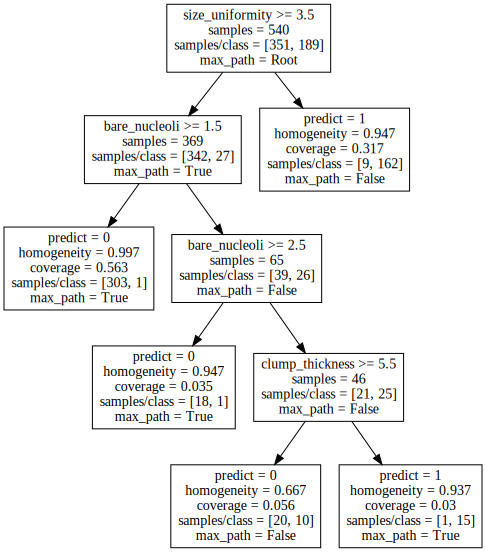

In [22]:
P_tree_graph

In [85]:
# 테스트 데이터로 예측
y_pred, y_prob = P_NEW_tree_ins.predict(test, target_attribute_name='class')
y_pred = y_pred['class'].astype(int)

# 정확도
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred) )

# f1-score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred) )

# AUC
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, y_pred) )

# confusion matrix
from sklearn.metrics import confusion_matrix
print( confusion_matrix(y_test, y_pred) )

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)



0.9555555555555556
0.9347826086956522
0.9460831721470019
[[86  2]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.96      0.91      0.93        47

    accuracy                           0.96       135
   macro avg       0.96      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



In [142]:
train.query('shape_uniformity < 1.5')['class'].value_counts()
train.query('shape_uniformity >= 1.5 and bare_nucleoli >= 8.5')['class'].value_counts()
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity < 1.5')['class'].value_counts()
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5 ')['class'].value_counts()
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli >= 8.5 ')['class'].value_counts()
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin < 2.5')['class'].value_counts()
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin >= 2.5 and marginal_adhesion >= 3.5')['class'].value_counts()
train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin >= 2.5 and marginal_adhesion < 3.5')['class'].value_counts()

# train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity < 1.5' ).shape
# train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5' ).shape
# train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin < 2.5' ).shape
# train.query('shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and bland_chromatin >= 2.5' ).shape

0    17
1     7
Name: class, dtype: int64

In [143]:
rule_list = [   'shape_uniformity < 1.5 and bare_nucleoli < 1.5',
                'shape_uniformity >= 1.5 and bare_nucleoli >= 8.5',
                'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity < 1.5',
                'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5',
                'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli >= 8.5',
                'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin < 2.5',
                'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin >= 2.5 and marginal_adhesion >= 3.5',
                'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin >= 2.5 and marginal_adhesion < 3.5',
                ]

In [34]:
rule_list  = ['shape_uniformity < 1.5',
              'shape_uniformity >= 1.5 and bare_nucleoli >= 8.5', 
              'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity < 1.5',
              'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5',
              'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli >= 8.5',
              'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin < 2.5',
              'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin >= 2.5 and marginal_adhesion >= 3.5',
              'shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin >= 2.5 and marginal_adhesion < 3.5'
]

In [35]:
rule_class = []
cover_count = []
coverage = []
class_0 = []
class_1 = []
homogeneity = []
    
for i in range(len(rule_list)):
    cover_count.append(len(train.query(rule_list[i]) ))
    coverage.append(round(len(train.query(rule_list[i])) / len(train), 3 ) )
    class_0.append( sum (train.query(rule_list[i])['class'] == 0) )
    class_1.append( sum (train.query(rule_list[i])['class'] == 1) )
    homogeneity.append(round( max(class_0[i], class_1[i]) / cover_count[i], 3 ) )
    rule_class.append(0 if class_0[i] > class_1[i] else 1)
    
rule_df = pd.DataFrame({'rule':rule_list, 'class':rule_class, 'cover_count':cover_count, 'coverage':coverage, 'homogeneity': homogeneity,
                    'class_0':class_0, 'class_1':class_1})    

# condition컬럼에서 and 개수 찾기
rule_df['cond_count'] = rule_df['rule'].str.count(' and ') + 1 

#condition에서 부호가 모두 같으면 1, 다르면 0
rule_df['cond_sign'] = rule_df['rule'].str.contains('>=') & rule_df['rule'].str.contains('<')
rule_df['cond_sign'] = rule_df['cond_sign'].astype(int)

pd.set_option('display.max_colwidth', None)
rule_df

,rule,class,cover_count,coverage,homogeneity,class_0,class_1,cond_count,cond_sign
0,shape_uniformity < 1.5,0,275,0.509,0.993,273,2,1,0
1,shape_uniformity >= 1.5 and bare_nucleoli >= 8.5,1,116,0.215,0.991,1,115,2,0
2,shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity < 1.5,0,34,0.063,1.000,34,0,3,1
3,shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness >= 8.5,1,28,0.052,1.000,0,28,4,1
4,shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli >= 8.5,1,17,0.031,1.000,0,17,5,1
5,shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin < 2.5,0,24,0.044,0.958,23,1,6,1
6,shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin >= 2.5 and marginal_adhesion >= 3.5,1,22,0.041,0.864,3,19,7,1
7,shape_uniformity >= 1.5 and bare_nucleoli < 8.5 and size_uniformity >= 1.5 and clump_thickness < 8.5 and normal_nucleoli < 8.5 and bland_chromatin >= 2.5 and marginal_adhesion < 3.5,0,24,0.044,0.708,17,7,7,1


## 2. 두번째

In [89]:
train2 = train.query('shape_uniformity >= 1.5')

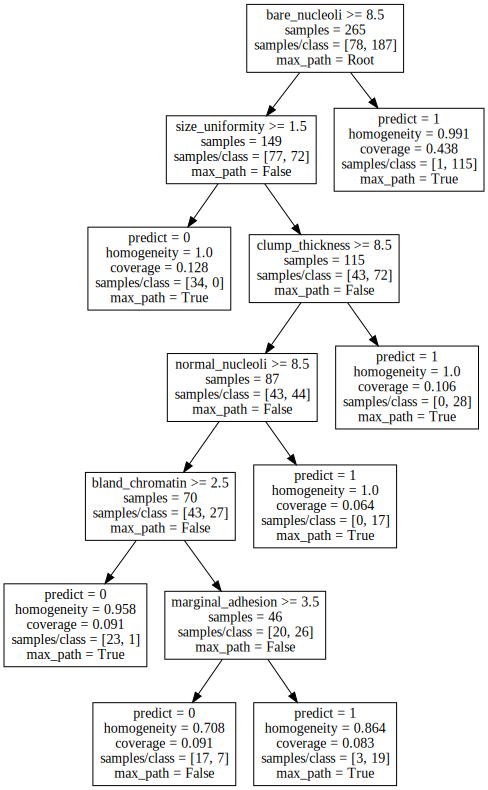

In [114]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train2, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

## 3. 세번째

In [91]:
train3 = train2.query('bare_nucleoli < 8.5')

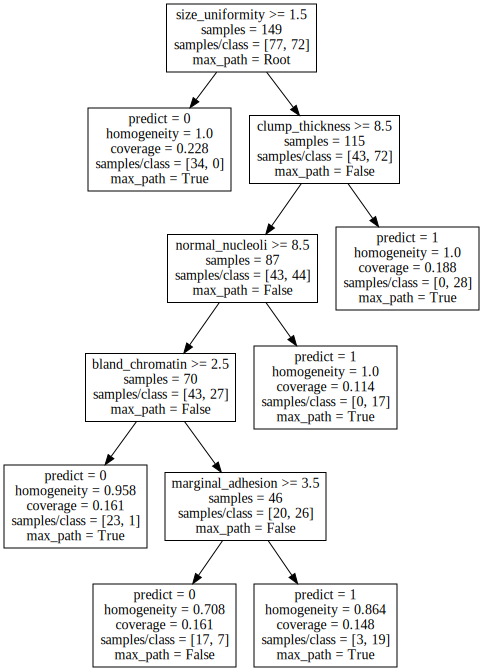

In [92]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train3, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

## 4. 네번째

In [93]:
train4 = train3.query('size_uniformity >= 1.5')

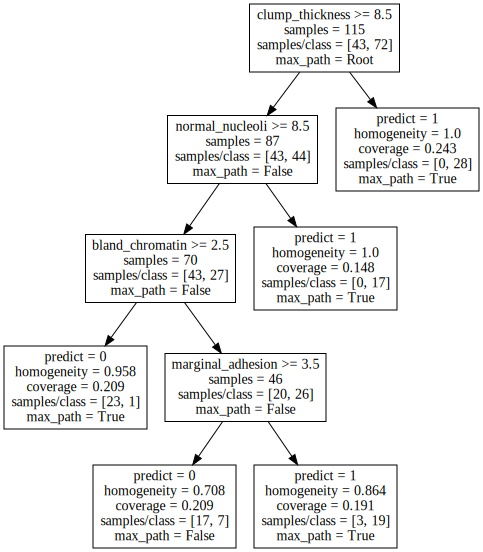

In [94]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train4, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

## 5. 다섯번째

In [95]:
train5 = train4.query('clump_thickness < 8.5')

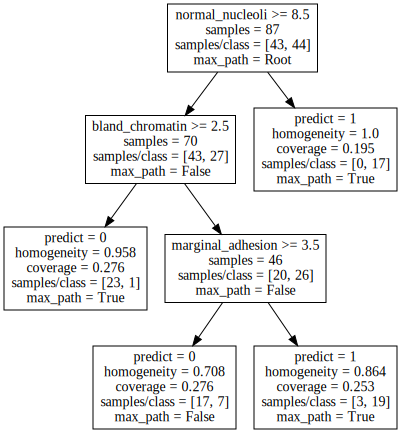

In [96]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train5, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

## 6. 여섯번째

In [99]:
train6 = train5.query('normal_nucleoli < 8.5')

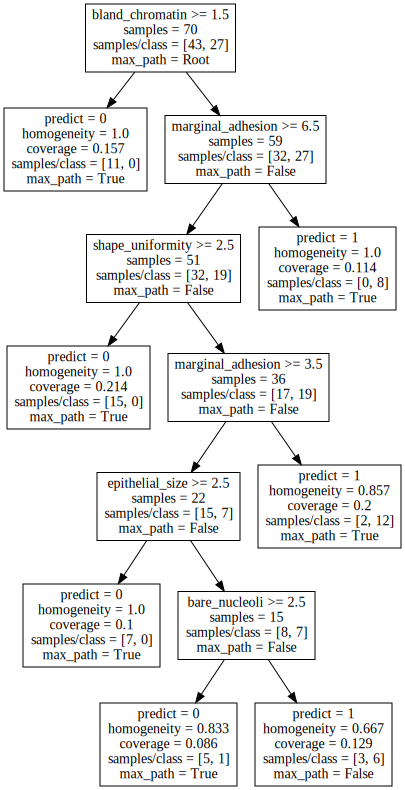

In [107]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=5, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train6, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

In [112]:
train.query('shape_uniformity >= 1.5 and size_uniformity < 1.5')

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
389,3,1,2,1,2,1,2,1,1,0
128,5,1,3,1,2,1,2,1,1,0
73,1,1,2,1,2,2,4,2,1,0
473,5,1,2,10,4,5,2,1,1,0
348,1,1,3,1,2,1,1,1,1,0
7,2,1,2,1,2,1,3,1,1,0
553,5,1,2,1,2,1,3,1,1,0
602,3,1,3,1,3,4,1,1,1,0
212,6,1,3,1,2,1,3,1,1,0
402,5,1,3,1,2,1,2,1,1,0


## 7. 일곱번째

In [102]:
train7 = train6.query('bland_chromatin >= 2.5')

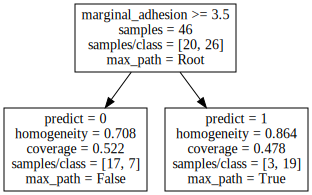

In [105]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train7, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)
P_tree_graph

In [89]:
train2 = train.query('shape_uniformity >= 1.5')

In [90]:
# 1. instance 생성
P_NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_, algorithm='paper', simplify=True)

# 2. 모델 학습(fit)
P_NEW_tree, P_NEW_graph_tree = P_NEW_tree_ins.fit(data=train2, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
P_dot_data= P_NEW_tree_ins.graph.tree_to_graph(P_NEW_graph_tree)

# 3. 시각화 
P_tree_graph = graphviz.Source(P_dot_data)

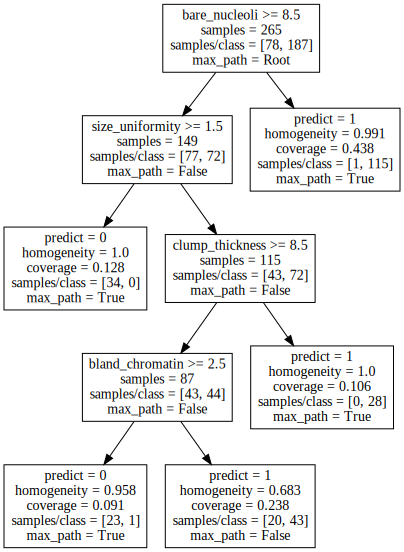

In [91]:
P_tree_graph

# [adaptive]

In [25]:
# 1. instance 생성
NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_range, algorithm='adaptive', simplify=True)

# 2. 모델 학습(fit)
NEW_tree, NEW_graph_tree = NEW_tree_ins.fit(data=train, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
dot_data= NEW_tree_ins.graph.tree_to_graph(NEW_graph_tree)

# 3. 시각화 
tree_graph = graphviz.Source(dot_data)

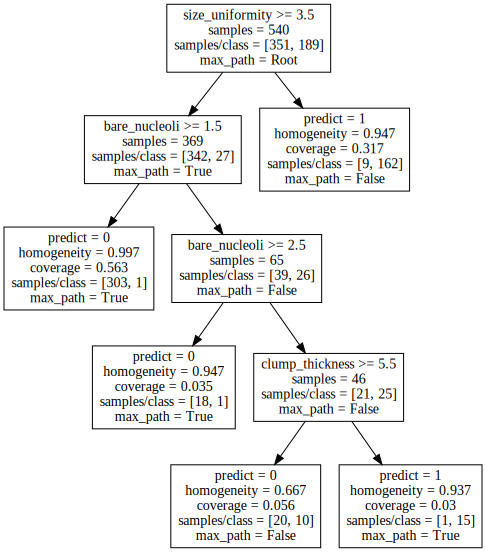

In [26]:
tree_graph

In [124]:
train.query('size_uniformity >= 3.5 and bare_nucleoli >= 8.5')
train.query('size_uniformity >= 3.5 and bare_nucleoli < 8.5 and marginal_adhesion >= 5.5' )
train.query('size_uniformity >= 3.5 and bare_nucleoli < 8.5 and marginal_adhesion < 5.5 and bland_chromatin >= 4.5' )
train.query('size_uniformity >= 3.5 and bare_nucleoli < 8.5 and marginal_adhesion < 5.5 and bland_chromatin < 4.5' )




,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
298,5,5,5,2,5,10,4,3,1,1
14,8,7,5,10,7,9,5,5,4,1
657,10,10,10,10,5,10,10,10,7,1
395,8,7,8,5,10,10,7,2,1,1
151,5,5,5,6,3,10,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...
658,5,10,10,10,4,10,5,6,3,1
564,8,10,10,10,6,10,10,10,1,1
226,10,4,5,5,5,10,4,1,1,1
168,8,6,5,4,3,10,6,1,1,1


In [135]:
train.query('size_uniformity < 3.5 and 

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
389,3,1,2,1,2,1,2,1,1,0
533,3,1,1,1,2,1,1,1,1,0
633,5,1,1,1,2,1,2,1,1,0
106,1,1,1,1,2,1,2,3,1,0
313,5,2,2,2,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...
596,5,1,1,1,2,1,2,1,1,0
580,4,1,1,1,2,1,2,1,1,0
601,5,1,1,2,1,1,2,1,1,0
375,3,1,1,1,2,1,2,1,1,0


In [ ]:
size_uniformity >= 3.5, bare_nucleoli >= 1.5, epithelial_size >= 2.5
size_uniformity >= 3.5, bare_nucleoli >= 1.5, epithelial_size < 2.5
size_uniformity >= 3.5, bare_nucleoli < 1.5, shape_uniformity >= 1.5
size_uniformity >= 3.5, bare_nucleoli < 1.5, shape_uniformity < 1.5
size_uniformity < 3.5, bare_nucleoli >= 8.5, marginal_adhension >= 5.5,  bland_chromatin >= 4.5
size_uniformity < 3.5, bare_nucleoli >= 8.5, marginal_adhension >= 5.5,  bland_chromatin < 4.5
size_uniformity < 3.5, bare_nucleoli >= 8.5, marginal_adhension < 5.5
size_uniformity < 3.5, bare_nucleoli < 8.5


In [94]:
NEW_tree_ins.tree

{'size_uniformity < 3.5': {'bare_nucleoli < 1.5': {'epithelial_size < 2.5': [0,
    389    0
    533    0
    633    0
    106    0
    313    0
          ..
    596    0
    580    0
    601    0
    375    0
    379    0
    Name: class, Length: 284, dtype: int64],
   'epithelial_size >= 2.5': [0,
    87     0
    367    0
    423    0
    77     0
    273    0
    650    0
    293    0
    562    0
    227    0
    144    0
    127    0
    433    0
    335    0
    55     1
    500    0
    410    0
    281    0
    398    0
    359    0
    358    0
    Name: class, dtype: int64]},
  'bare_nucleoli >= 1.5': {'shape_uniformity < 1.5': [0,
    292    0
    604    0
    159    0
    6      0
    140    0
    113    0
    116    0
    464    0
    149    0
    108    0
    369    0
    2      0
    133    0
    158    0
    307    1
    235    0
    215    1
    519    0
    119    0
    422    0
    383    0
    117    0
    13     0
    76     0
    59     0
    81     0
    421    

# Simplify = True

In [21]:
# 1. instance 생성
NEW_tree_ins = utr(min_samples=n_samples, max_depth=MAX_DEPTH, params=lambda_range, algorithm='adaptive', simplify=True)

# 2. 모델 학습(fit)
NEW_tree, NEW_graph_tree = NEW_tree_ins.fit(data=train, target_attribute_name = "class")

# 3. DT 시각화 위한 string 값 생성
dot_data= NEW_tree_ins.graph.tree_to_graph(NEW_graph_tree)

# 3. 시각화 
tree_graph = graphviz.Source(dot_data)

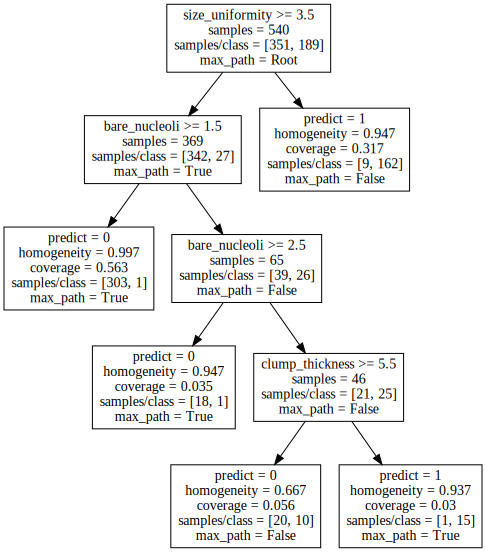

In [22]:
tree_graph

In [177]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [44]:
NEW_tree_ins.tree

{'size_uniformity < 3.5': {'bare_nucleoli < 1.5': [0,
   316    0
   193    0
   144    0
   640    0
   34     0
         ..
   277    0
   9      0
   359    0
   192    0
   629    0
   Name: class, Length: 298, dtype: int64],
  'bare_nucleoli >= 1.5': {'shape_uniformity < 1.5': [0,
    440    0
    159    0
    6      0
    422    0
    369    0
    108    0
    604    0
    237    0
    59     0
    158    0
    81     0
    13     0
    627    0
    116    0
    2      0
    519    0
    133    0
    421    0
    117    0
    464    0
    149    0
    307    1
    383    0
    292    0
    143    0
    119    0
    486    0
    Name: class, dtype: int64],
   'shape_uniformity >= 1.5': {'bare_nucleoli < 5.5': [0,
     101    1
     399    0
     12     1
     342    0
     602    0
     614    0
     336    1
     112    0
     397    0
     468    1
     114    0
     598    0
     232    0
     61     1
     394    0
     73     0
     274    1
     260    1
     280    0
     5